# Intro

In [ ]:
import numpy as np

inputs = np.array([1, -1, 0, -2, 3])
weights = np.array([1, 2, 1, -1, -3])
bias = -1

output = np.dot(inputs, weights)+bias
print(f"Given\nInput = {input}\nWeights = {weights}\nBias = {bias}\nOutput = {output}")

Given
Input = <bound method Kernel.raw_input of <google.colab._kernel.Kernel object at 0x7c6d7a39b790>>
Weights = [ 1  2  1 -1 -3]
Bias = -1
Output = -9


In [ ]:
active_output = max(0, output)
print(f"Output after applying ReLU Activation: {active_output}")

Output after applying ReLU Activation: 0


# Multi layered Neural networks

In [ ]:
# 4 inputs for the Multi-layered perceptron
inputs = np.random.random(4)
# The weights for 4 inputs for 3 neurons in the layer.
weights = np.random.random((3, 4))
# 3 biases for each neuran in the layer
biases = np.random.random(3)
# output
output = np.dot(inputs, weights.T)+biases
print(f"inputs = {inputs}\nweights = {weights}\nbiases = {biases}\noutput = {output}\nReLU activation output = {[x for x in output]}")


inputs = [0.28833054 0.73203449 0.46820304 0.22803172]
weights = [[0.25303829 0.44443486 0.79903752 0.00419517]
 [0.22260739 0.01562435 0.43225884 0.26347976]
 [0.02120119 0.83541756 0.11666651 0.86941521]]
biases = [0.10744278 0.82558322 0.71036795]
output = [0.88081151 1.16367194 1.58091322]
ReLU activation output = [0.8808115114892827, 1.1636719422541277, 1.5809132196891331]


In [ ]:
class Layer:
  def __init__(self, num_neurons, num_inputs, num_batches):
    self.inputs = np.random.random((num_batches, num_inputs))*5-3
    self.weights = np.random.random((num_neurons, num_inputs))*4-2
    self.biases = np.random.random(num_neurons)*2-1



  def forward(self, input):
    self.output = np.dot(input, self.weights.T)+self.biases
    self.activationOutput = [[max(0,a) for a in b] for b in self.output]
    self.activationOutput = np.array(self.activationOutput)

  def print(self):
    print(f"input: {self.inputs}\nweights: {self.weights}\nbiases: {self.biases}\noutput: {self.output}\noutput after ReLU activation: {self.activationOutput}")
layer1 = Layer(4, 5, 10)
layer1.forward(layer1.inputs)
layer1.print()

input: [[-1.06152673  0.18355843  0.45504543  0.3098211  -1.15931506]
 [-2.15016768 -2.01301296 -2.32980657 -1.30787652  1.91241843]
 [-1.4548217   0.63174851 -0.72897484  0.54870685  0.23746783]
 [-0.312655   -0.23921392  1.02034176  1.35707723 -2.16038948]
 [ 1.27483419 -1.03376508  0.10810477 -0.43607989  0.94116085]
 [-2.20291261  0.39981156  1.77928995  1.2330338  -2.27343836]
 [-1.83909075 -2.70596235  0.3218257  -1.62821485 -2.24747599]
 [-1.17441952 -2.56252107  1.11773452 -0.40097533 -2.08444172]
 [ 1.27732152  1.41509697  0.30226694  0.51507851  0.89182038]
 [-2.7886428   1.44327528 -1.02291803 -2.15770853  0.13284359]]
weights: [[-0.44555839 -0.98332148  0.78134787 -0.35742513  1.92462357]
 [ 0.76356945 -1.43085632  0.92638119 -1.9059411  -0.99767374]
 [ 0.59778542 -0.84199395  0.66278818  0.18524428 -1.11107831]
 [ 0.59074786 -0.57092937 -1.16720506 -1.07979035 -0.99435095]]
biases: [ 0.45258296  0.0877187  -0.08344668  0.36074582]
output: [[-1.24137602e+00  2.18653295e-03 

In [ ]:
#now adding another layer next to the layer 1 which will recieve input from the layer 1
layer2 = Layer(3, 4, 1)
layer2.forward(layer1.output)
layer2.print()

input: [[ 1.99306905 -1.44685382 -2.32655948 -2.44087846]]
weights: [[ 1.18264344  0.70182155 -0.93030432 -1.65078699]
 [-0.632777    1.23475534 -0.3514326   0.25230521]
 [ 1.35362585  0.07737762  0.89115363 -0.22156467]]
biases: [0.65340619 0.54474542 0.47602905]
output: [[-1.39494167  1.03956245 -0.49532574]
 [ 6.50013538 -1.49559995  4.45454706]
 [ 1.49271445 -3.82307689 -1.30628151]
 [-5.13075187  2.13112001 -0.60782689]
 [ 3.62602796  1.91056264  4.86283892]
 [-0.80792801 -0.04347284 -0.32795918]
 [-3.65503503 10.27736714  3.8469783 ]
 [-1.9256999   7.60412977  5.03903801]
 [ 2.74894655 -2.72415688 -0.1143875 ]
 [ 2.27892311  0.69556955 -2.94416573]]
output after ReLU activation: [[ 0.          1.03956245  0.        ]
 [ 6.50013538  0.          4.45454706]
 [ 1.49271445  0.          0.        ]
 [ 0.          2.13112001  0.        ]
 [ 3.62602796  1.91056264  4.86283892]
 [ 0.          0.          0.        ]
 [ 0.         10.27736714  3.8469783 ]
 [ 0.          7.60412977  5.0390

# Training

In [1]:
import pandas as pd
import numpy as np
import time
%matplotlib inline

In [4]:
car_train = pd.read_csv("train_set_CarMarketPlace.csv")
car_test = pd.read_csv("test_set_CarMarketPlace.csv")

In [5]:
car_train.head(10)

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,Lexus,2019.0,20000.0,Petrol,Automatic,First,22.37,2487.0,214.56,5.0,5150000.0
1,Maruti,2013.0,80000.0,CNG,Manual,Second,32.52,998.0,58.33,5.0,270000.0
2,Tata,2017.0,70000.0,Diesel,Manual,First,19.09,1405.0,69.01,5.0,450000.0
3,Ford,2016.0,70000.0,Diesel,Manual,Second,25.83,1498.0,99.00,5.0,350000.0
4,Maruti,2016.0,81000.0,Diesel,Manual,Second,28.09,1248.0,88.50,5.0,650000.0
5,Maruti,2010.0,60000.0,Petrol,Manual,Second,17.50,1298.0,85.80,5.0,240000.0
6,Honda,2017.0,28000.0,Petrol,Manual,First,17.80,1497.0,117.30,5.0,860000.0
7,Mahindra,2015.0,70000.0,Diesel,Manual,First,15.40,2179.0,120.00,7.0,1100000.0
8,Renault,2018.0,26000.0,Diesel,Manual,First,19.60,1461.0,108.45,5.0,950000.0
9,Maruti,2020.0,30000.0,Petrol,Manual,First,22.05,796.0,47.30,5.0,250999.0


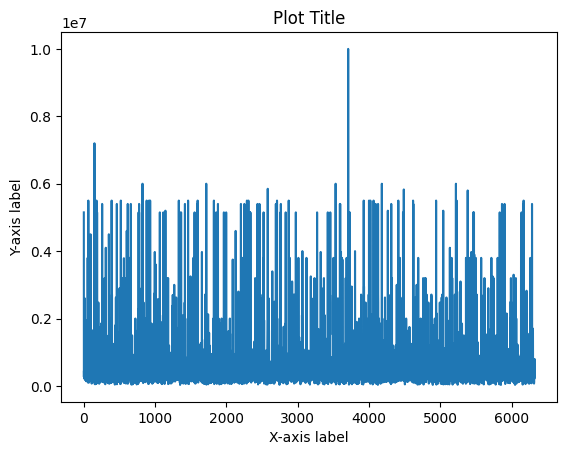

In [6]:
import matplotlib.pyplot as plt

car_train['Price'].plot()
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot Title')
plt.show()

In [7]:
car_test.head(10)

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,Volkswagen,2014.0,84000.0,Diesel,Manual,Second,20.14,1498.0,88.50,5.0,300000.0
1,Renault,2018.0,18000.0,Diesel,Manual,First,19.60,1461.0,108.45,5.0,1050000.0
2,Maruti,2017.0,37000.0,Diesel,Automatic,First,26.80,1248.0,74.00,5.0,625000.0
3,Toyota,2014.0,120000.0,Diesel,Manual,First,12.99,2494.0,100.60,7.0,750000.0
4,Maruti,2016.0,45000.0,Petrol,Manual,First,21.40,1197.0,83.10,5.0,575000.0
5,Ford,2013.0,70000.0,Diesel,Manual,First,20.00,1399.0,68.10,5.0,229999.0
6,Maruti,2014.0,40000.0,Petrol,Manual,Second,20.92,998.0,67.10,5.0,254999.0
7,Hyundai,2014.0,60000.0,Diesel,Manual,First,22.32,1582.0,126.32,5.0,730000.0
8,Maruti,2010.0,35000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,200000.0
9,Maruti,2014.0,145500.0,Diesel,Manual,First,23.40,1248.0,74.00,5.0,450000.0


In [8]:
print(car_train.info(),"\n",car_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           6320 non-null   object 
 1   Model             6320 non-null   float64
 2   Odometer reading  6320 non-null   float64
 3   fuel              6320 non-null   object 
 4   transmission      6320 non-null   object 
 5   owner             6320 non-null   object 
 6   mileage           6320 non-null   float64
 7   engine            6320 non-null   float64
 8   max_power         6320 non-null   float64
 9   seats             6320 non-null   float64
 10  Price             6320 non-null   float64
dtypes: float64(7), object(4)
memory usage: 543.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1581

In [9]:
print(car_train[car_train.duplicated()])

      Company   Model  Odometer reading    fuel transmission  owner  mileage  \
175     Lexus  2019.0           20000.0  Petrol    Automatic  First    22.37   
178       BMW  2019.0            8500.0  Diesel    Automatic  First    16.78   
186     Lexus  2019.0           20000.0  Petrol    Automatic  First    22.37   
204     Volvo  2018.0            2000.0  Diesel    Automatic  First    16.80   
238     Skoda  2016.0           11000.0  Petrol    Automatic  First    14.30   
...       ...     ...               ...     ...          ...    ...      ...   
6288   Maruti  2018.0           38817.0  Diesel       Manual  First    27.39   
6292  Hyundai  2016.0           40000.0  Diesel       Manual  First    24.80   
6297   Maruti  2016.0           23700.0  Petrol       Manual  First    20.40   
6304  Hyundai  2017.0           56290.0  Diesel       Manual  First    24.00   
6308    Honda  2016.0           56494.0  Petrol       Manual  First    18.20   

      engine  max_power  seats      Pri

In [10]:
print(car_test[car_test.duplicated()])

      Company   Model  Odometer reading    fuel transmission   owner  mileage  \
136     Volvo  2018.0            2000.0  Diesel    Automatic   First    16.80   
166      Tata  2015.0          110000.0  Diesel       Manual   First    14.10   
189    Jaguar  2017.0           45000.0  Diesel    Automatic   First    19.33   
190     Honda  2019.0            7032.0  Petrol    Automatic   First    19.00   
205       BMW  2019.0            8500.0  Diesel    Automatic   First    16.78   
...       ...     ...               ...     ...          ...     ...      ...   
1555  Hyundai  2015.0          108000.0  Diesel       Manual   First    21.19   
1556      BMW  2019.0            7500.0  Diesel    Automatic   First    16.78   
1558   Toyota  2013.0           79328.0  Diesel       Manual  Second    12.99   
1564    Volvo  2019.0           20000.0  Diesel    Automatic   First    18.00   
1575   Toyota  2011.0           70000.0  Petrol       Manual   First    17.60   

      engine  max_power  se

In [11]:
car_train.drop_duplicates(inplace=True)
car_test.drop_duplicates(inplace=True)

In [12]:
print(car_train[car_train.isna().any(axis=1)].index)
car_train = car_train.dropna(how='any')

Index([647], dtype='int64')


In [13]:
print(car_test[car_test.isna().any(axis=1)].index)
car_test = car_test.dropna(how='any')

Index([249], dtype='int64')


In [14]:
print(car_train.skew())

TypeError: could not convert string to float: 'Lexus'

In [15]:
print(car_test.skew())

TypeError: could not convert string to float: 'Volkswagen'

In [16]:
# feature scaling
target_avg = max(car_train['Price']) - min(car_train['Price'])
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
label_encoder = LabelEncoder()
for column in ["Company", "fuel", "transmission", "owner"]:
  car_train[column] = label_encoder.fit_transform(car_train[column])
scaler = MinMaxScaler()
car_train_norm = pd.DataFrame(scaler.fit_transform(car_train[car_train.columns[:-1]]), columns=car_train.columns[:-1])
car_train_norm

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats
0,0.566667,0.961538,0.008473,1.000000,0.0,0.000000,0.532619,0.625168,0.494989,0.250000
1,0.666667,0.730769,0.033891,0.000000,1.0,0.666667,0.774286,0.125503,0.069526,0.250000
2,0.900000,0.884615,0.029655,0.333333,1.0,0.000000,0.454524,0.262081,0.098611,0.250000
3,0.300000,0.846154,0.029655,0.333333,1.0,0.666667,0.615000,0.293289,0.180283,0.250000
4,0.666667,0.846154,0.034315,0.333333,1.0,0.666667,0.668810,0.209396,0.151688,0.250000
...,...,...,...,...,...,...,...,...,...,...
5454,0.633333,0.769231,0.025418,0.333333,1.0,0.666667,0.359524,0.521812,0.291939,0.416667
5455,0.366667,0.807692,0.014827,1.000000,1.0,0.000000,0.442857,0.192282,0.133524,0.250000
5456,0.666667,0.923077,0.014827,0.333333,1.0,0.000000,0.676190,0.209396,0.112255,0.250000
5457,0.833333,0.846154,0.018640,1.000000,1.0,0.000000,0.599286,0.058725,0.055828,0.250000


In [17]:
target_avg_test = max(car_test['Price']) - min(car_test['Price'])

In [18]:
print(target_avg, target_avg_test)

9970001.0 5965000.0


In [19]:
car_train_target = pd.DataFrame(car_train['Price']/target_avg)

In [20]:
import seaborn as sns

<Axes: >

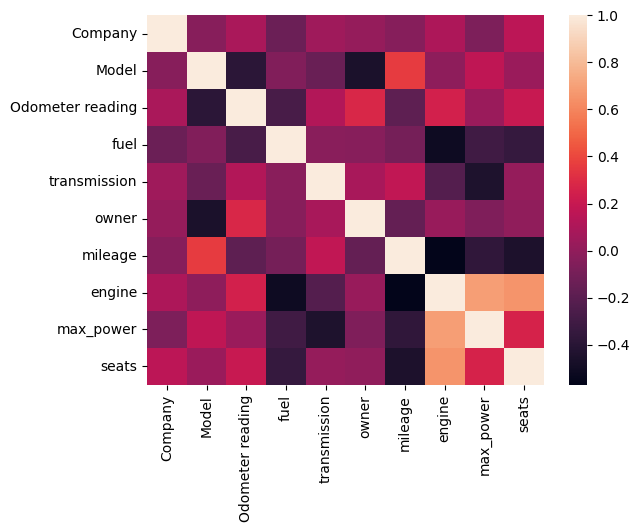

In [21]:
sns.heatmap(data = car_train_norm.corr())

In [22]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
label_encoder = LabelEncoder()
for column in ["Company", "fuel", "transmission", "owner"]:
  car_test[column] = label_encoder.fit_transform(car_test[column])
scaler = MinMaxScaler()
car_test_norm = pd.DataFrame(scaler.fit_transform(car_test[car_test.columns[:-1]]), columns=car_test.columns[:-1])
car_test_norm

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats
0,0.962963,0.727273,0.055370,0.333333,1.0,0.666667,0.661195,0.293289,0.220911,0.166667
1,0.814815,0.909091,0.011341,0.333333,1.0,0.000000,0.643467,0.280872,0.302075,0.166667
2,0.666667,0.863636,0.024016,0.333333,0.0,0.000000,0.879842,0.209396,0.161920,0.166667
3,0.925926,0.727273,0.079386,0.333333,1.0,0.000000,0.426461,0.627517,0.270138,0.500000
4,0.666667,0.818182,0.029353,1.000000,1.0,0.000000,0.702561,0.192282,0.198942,0.166667
...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.727273,0.152769,0.333333,0.0,0.000000,0.516415,0.451007,0.570098,0.166667
1455,0.259259,0.909091,0.021588,0.333333,1.0,0.000000,0.747538,0.293289,0.261961,0.166667
1456,0.333333,0.863636,0.035357,0.333333,1.0,0.000000,0.739987,0.259060,0.221847,0.166667
1457,0.666667,0.545455,0.079386,1.000000,1.0,1.000000,0.646750,0.057718,0.003255,0.666667


In [23]:
car_test_target = pd.DataFrame(car_test['Price']/target_avg_test)

In [24]:
print(car_train_norm.corr())

                   Company     Model  Odometer reading      fuel  \
Company           1.000000 -0.032806          0.089899 -0.135951   
Model            -0.032806  1.000000         -0.390624 -0.059339   
Odometer reading  0.089899 -0.390624          1.000000 -0.274442   
fuel             -0.135951 -0.059339         -0.274442  1.000000   
transmission      0.051428 -0.143906          0.118834 -0.027492   
owner             0.017794 -0.457894          0.276622 -0.031450   
mileage          -0.038966  0.358604         -0.188583 -0.100940   
engine            0.100342 -0.008503          0.245878 -0.513575   
max_power        -0.069990  0.170885          0.031537 -0.303616   
seats             0.158667  0.035445          0.200423 -0.345650   

                  transmission     owner   mileage    engine  max_power  \
Company               0.051428  0.017794 -0.038966  0.100342  -0.069990   
Model                -0.143906 -0.457894  0.358604 -0.008503   0.170885   
Odometer reading      0.11

In [25]:
print(car_train_norm.skew())
print(car_test_norm.skew())

Company             -0.224000
Model               -0.960878
Odometer reading    12.811756
fuel                 0.157575
transmission        -2.915050
owner                0.764142
mileage             -0.177588
engine               1.227546
max_power            1.740480
seats                1.949173
dtype: float64
Company            -0.321576
Model              -0.856748
Odometer reading    9.005418
fuel                0.328251
transmission       -2.815256
owner               0.802628
mileage            -0.115311
engine              1.205321
max_power           1.705218
seats               1.792995
dtype: float64


<Axes: >

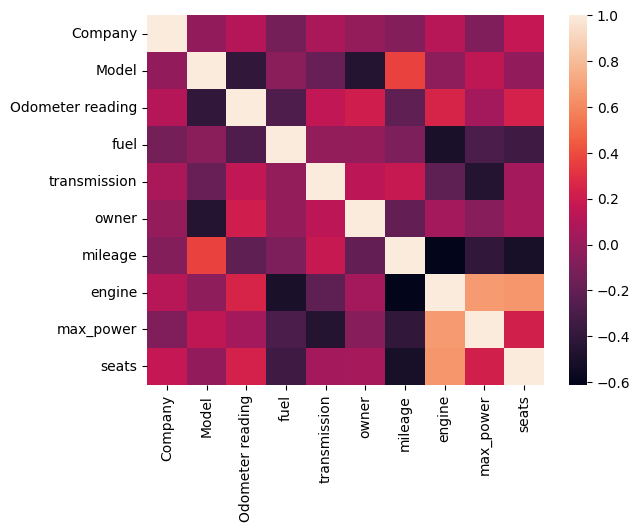

In [26]:
sns.heatmap(data = car_test_norm.corr())

In [27]:
car_train.cov()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
Company,47.570538,-0.884150,3.546989e+04,-0.942245,0.100364,0.131525,-1.088539,3.400728e+02,-1.542724e+01,1.071864,-1.213024e+05
Model,-0.884150,15.269272,-8.731836e+04,-0.233004,-0.159109,-1.917492,5.675697,-1.632658e+01,2.134002e+01,0.135657,8.781236e+05
Odometer reading,35469.893373,-87318.361890,3.272466e+09,-15776.095107,1923.479934,16958.372168,-43695.301617,6.911596e+06,5.765481e+04,11229.735493,-4.821771e+09
fuel,-0.942245,-0.233004,-1.577610e+04,1.009768,-0.007817,-0.033868,-0.410837,-2.535920e+02,-9.750261e+00,-0.340199,-1.302945e+05
transmission,0.100364,-0.159109,1.923480e+03,-0.007817,0.080060,0.024205,0.198838,-3.151567e+01,-4.022490e+00,0.004659,-6.838594e+04
owner,0.131525,-1.917492,1.695837e+04,-0.033868,0.024205,1.148467,-0.707570,1.541463e+01,-2.234849e+00,-0.004896,-1.354721e+05
mileage,-1.088539,5.675697,-4.369530e+04,-0.410837,0.198838,-0.707570,16.405467,-1.135927e+03,-4.824792e+01,-1.777495,-2.269881e+05
engine,340.072827,-16.326580,6.911596e+06,-253.592031,-31.515671,15.414634,-1135.927321,2.414576e+05,1.083854e+04,314.286615,1.182426e+08
max_power,-15.427240,21.340016,5.765481e+04,-9.750261,-4.022490,-2.234849,-48.247917,1.083854e+04,1.021318e+03,8.144499,1.185119e+07
seats,1.071864,0.135657,1.122974e+04,-0.340199,0.004659,-0.004896,-1.777495,3.142866e+02,8.144499e+00,0.959335,8.327299e+04


In [28]:
data=car_test.cov()

In [29]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.8 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=4e56d13122b792926370f6589349540ca7096f041fc1887dcc37c64901166416
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [30]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display

In [51]:
class MLP:
  def __init__(self, layers, epochs, learning_rate, lambda_reg, dropout_prob):
    self.layers = layers
    self.epochs = epochs
    self.learningRate = learning_rate
    self.params = {}
    self.dropout_prob = dropout_prob
    self.lambda_reg = lambda_reg

    inputLayerDim = layers[0]
    hiddenLayer1Dim = layers[1]
    hiddenLayer2Dim = layers[2]
    hiddenLayer3Dim = layers[3]
    outputLayerDim = layers[4]

    self.params = {
        'W1':np.random.randn(hiddenLayer1Dim, inputLayerDim),
        'B1':np.random.randn(hiddenLayer1Dim),
        'W2':np.random.randn(hiddenLayer2Dim, hiddenLayer1Dim),
        'B2':np.random.randn(hiddenLayer2Dim),
        'W3':np.random.randn(hiddenLayer3Dim, hiddenLayer2Dim),
        'B3':np.random.randn(hiddenLayer3Dim),
        'W4':np.random.randn(outputLayerDim, hiddenLayer3Dim),
        'B4':np.random.randn(1),
    }

    # Create empty lists for storing accuracies
    self.epochs_list = []
    self.train_accuracies = []
    self.test_accuracies = []

    # Create the plot
    plt.ion()  # Turn on interactive mode
    self.fig, self.ax = plt.subplots()
    self.ax.set_xlabel('Epochs')
    self.ax.set_ylabel('Accuracy')
    self.ax.set_title('Training and Test Accuracy')
    self.train_line, = self.ax.plot([], [], label='Train Accuracy')
    self.test_line, = self.ax.plot([], [], label='Test Accuracy')
    self.ax.legend()
    plt.show()


  def initialize_weights_xavier(self, input_units, output_units):
    variance = 2.0 / (input_units + output_units)
    stddev = np.sqrt(variance)
    return np.random.normal(loc=0, scale=stddev, size=(input_units, output_units))

  def ReLU(self, x, deriv = False):
    if deriv:
      return np.where(x<0, 0.1, 1)
    else:
      return np.maximum(x, 0.1*x)

  def forward(self, x_train, training):
    if(np.isnan(x_train).any()):
      print(f"forward pass: {x_train}")
    params = self.params
    params['A0'] = x_train
    params['Z1'] = np.dot(params['A0'], params['W1'].T)+params['B1']
    params['A1'] = self.ReLU(params['Z1'])
    if training:
      params['A1'] = self.dropout(params['A1'], self.dropout_prob)
    params['Z2'] = np.dot(params['A1'], params['W2'].T)+params['B2']
    params['A2'] = self.ReLU(params['Z2'])
    if training:
      params['A2'] = self.dropout(params['A2'], self.dropout_prob)
    params['Z3'] = np.dot(params['A2'], params['W3'].T)+params['B3']
    params['A3'] = self.ReLU(params['Z3'])
    if training:
      params['A3'] = self.dropout(params['A3'], self.dropout_prob)
    params['Z4'] = np.dot(params['A3'], params['W4'].T)+params['B4']
    return params['Z4']

  def backProp(self, y_train, output):
    params = self.params
    change_w = {}
    change_b = {}

    error = 2*(output-y_train)/output.shape[0]
    change_w['W4'] = np.outer(error, params['A3']) + 2 * self.lambda_reg * params['W4']
    change_b['B4'] = error.sum()

    error = np.dot(params['W4'].T, error)*self.ReLU(params['Z3'], deriv=True)
    change_w['W3'] = np.outer(error, params['A2']) + 2 * self.lambda_reg * params['W3']
    change_b['B3'] = error.sum()

    error = np.dot(params['W3'].T, error)*self.ReLU(params['Z2'], deriv=True)
    change_w['W2'] = np.outer(error, params['A1']) + 2 * self.lambda_reg * params['W2']
    change_b['B2'] = error.sum()

    error = np.dot(params['W2'].T, error)*self.ReLU(params['Z1'], deriv=True)
    change_w['W1'] = np.outer(error, params['A0']) + 2 * self.lambda_reg * params['W1']
    change_b['B1'] = error.sum()

    return change_w, change_b

  def update_weights(self, change_w, change_b):
    for keys, values in change_w.items():
      self.params[keys] -= self.learningRate*values

    for keys, values in change_b.items():
      self.params[keys] -= self.learningRate*values


  def loss(self, y_train, output):
    return (y_train-output)**2

  def dropout(self, x, prob):
    mask = np.random.binomial(1, prob, size=x.shape)
    return x * mask

  def accuracy(self, train_x, train_y, test_x, test_y):
    predictions_tn = []
    predictions_tt = []
    ttx = np.asfarray(test_x)
    tty = np.asfarray(test_y)
    tnx = np.asfarray(train_x)
    tny = np.asfarray(train_y)
    for x, y in zip(ttx, tty):
      inputs = np.asfarray(x)
      targets = np.asfarray(y)
      output = self.forward(inputs, training=False)
      #print(output, targets)
      predictions_tt.append(abs(output-targets) <= 0.03)

    for x, y in zip(tnx, tny):
      inputs = np.asfarray(x)
      targets = np.asfarray(y)
      output = self.forward(inputs, training=False)
      #print(output, targets)
      predictions_tn.append(abs(output-targets) <= 0.03)


    return np.mean(predictions_tn), np.mean(predictions_tt)

  def predict(self, x_test):

    tx = np.asfarray(x_test)
    y = []
    i=0
    for x in tx:
      inputs = np.asfarray(x)
      output = self.forward(inputs, training=False)
      y.append(output)
    return y

  def train(self, train_x, train_y, test_x, test_y):
    start_time = time.time()
    tx = np.asfarray(train_x)
    ty = np.asfarray(train_y)

    train_accuracy = []
    test_accuracy = []

    for i in range(self.epochs):
      for x, y in zip(tx, ty):
        inputs = np.asfarray(x)
        targets = np.asfarray(y)
        output = self.forward(inputs, training=False)
        change_w, change_b = self.backProp(targets, output)
        self.update_weights(change_w, change_b)

      accuracy = self.accuracy(train_x, train_y, test_x, test_y)
      self.epochs_list.append(i)
      self.train_accuracies.append(accuracy[0])
      self.test_accuracies.append(accuracy[1])

      # Update the plot with new data
      self.train_line.set_data(self.epochs_list, self.train_accuracies)
      self.test_line.set_data(self.epochs_list, self.test_accuracies)
      self.ax.relim()  # Update the limits of the axes
      self.ax.autoscale_view(True, True, True)  # Autoscale the view
      self.fig.canvas.draw()  # Redraw the figure
      self.fig.canvas.flush_events()  # Ensure the GUI event loop runs to update the figure
      #time.sleep(0.1)  # Add a small delay to simulate processing time
      clear_output(wait=True)
      display(self.fig)

      #print(f"Epoch: {i+1}, Time: {time.time()- start_time}, Train Accuracy: {accuracy[0]*100}, Test Accuracy: {accuracy[1]*100}")
      # Plot final accuracies after training
    plt.ioff()  # Turn off interactive mode
    plt.show()

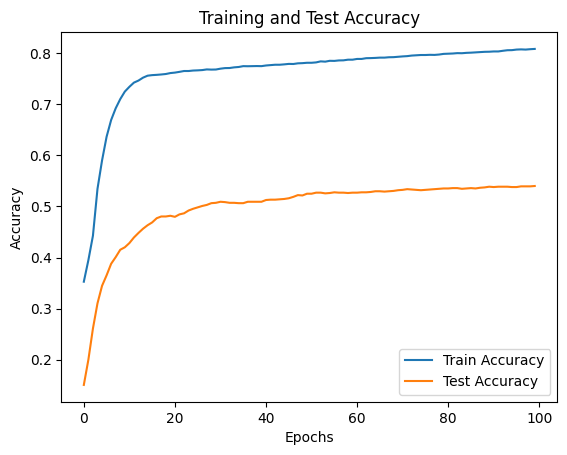

In [52]:
np.random.seed(42)
mlp = MLP([10, 16, 8, 4, 1], epochs = 100, learning_rate = 0.001, lambda_reg=0.00001, dropout_prob=0)
mlp.train(car_train_norm, car_train_target, car_test_norm, car_test_target)

In [ ]:
print(max(car_train['Price']))

10000000.0


In [ ]:
min(car_train['Price'])

29999.0

In [53]:
y_pred_ = mlp.predict(car_test_norm)

In [55]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your MLP model and obtained predictions
# X_test: Features of the test data
# y_test: True labels of the test data
# y_pred: Predicted labels by your MLP model

y_test = np.asfarray(car_test_target)

#print(y_test.shape)
#print(y_pred_.shape)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.007448556190887706
Mean Absolute Error: 0.04571658197878708
R-squared (R2) Score: 0.2515384875327653


# Report
## Train Tolerance <= 0.02
* Layers[10, 8, 4, 1] = [Epoch: 100, Time: 59.71622896194458, Train Accuracy: 75.14196739329547, Test Accuracy: 60.178204249485944]
* Layers[10, 16, 4, 1] = [Epoch: 100, Time: 72.73399090766907, Train Accuracy: 79.33687488551017, Test Accuracy: 51.199451679232354]
* Layers[10, 16, 8, 4, 1] = [Epoch: 100, Time: 71.96950101852417, Train Accuracy: 79.33687488551017, Test Accuracy: 51.199451679232354]
* Layers[10, 32, 16, 4, 1] = [Epoch: 15, Time: 11.228869438171387, Train Accuracy: 0.0, Test Accuracy: 0.0]
* Layers[10, 16, 4, 2, 1] = [Epoch: 100, Time: 72.23611855506897, Train Accuracy: 74.70232643341271, Test Accuracy: 45.716244002741604]
* Layers[10, 8, 4, 2, 1] = [Epoch: 100, Time: 64.68675875663757, Train Accuracy: 70.2326433412713, Test Accuracy: 41.19259766963674]
* Layers[10, 8, 4, 4, 1] = [Epoch: 100, Time: 63.42126274108887, Train Accuracy: 72.70562374061184, Test Accuracy: 36.66895133653187]
* Layers[10, 16, 8, 8, 1] = [Epoch: 100, Time: 73.76713037490845, Train Accuracy: 79.86810771203517, Test Accuracy: 45.3050034270048]
* Layers[10, 16, 16, 4, 1] = [Epoch: 100, Time: 74.0439715385437, Train Accuracy: 79.53837699212309, Test Accuracy: 51.130911583276216]
* Layers[10, 16, 16, 8, 1] = [Epoch: 24, Time: 22.547998666763306, Train Accuracy: 0.0, Test Accuracy: 0.0]
* Layers[10, 8, 16, 4, 1] = [Epoch: 100, Time: 82.5772774219513, Train Accuracy: 78.32936435244551, Test Accuracy: 57.710760795065106]
* Layers[10, 8, 8, 8, 1] = [Epoch: 100, Time: 80.23075890541077, Train Accuracy: 77.13867008609635, Test Accuracy: 42.76901987662783]


Kolmogorov-Smirnov Test Results:
                  KS Statistic        P-Value
Company               0.406701  2.020575e-171
Model                 0.016798   8.947608e-01
Odometer reading      0.039213   5.620405e-02
fuel                  0.037117   8.138181e-02
transmission          0.004784   1.000000e+00
owner                 0.008049   9.999989e-01
mileage               0.041193   3.889253e-02
engine                0.038702   6.162649e-02
max_power             0.025536   4.322164e-01
seats                 0.023233   5.538216e-01
Price                 0.026868   3.691310e-01


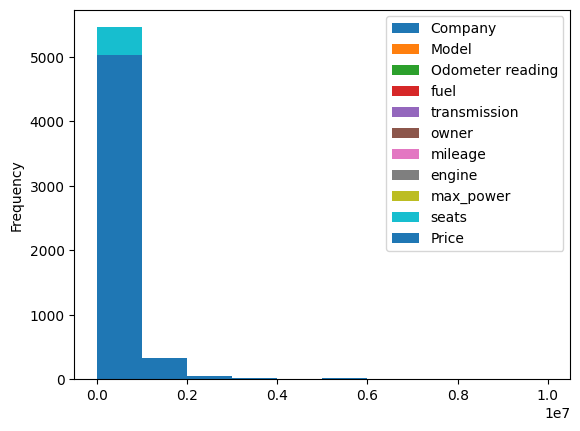

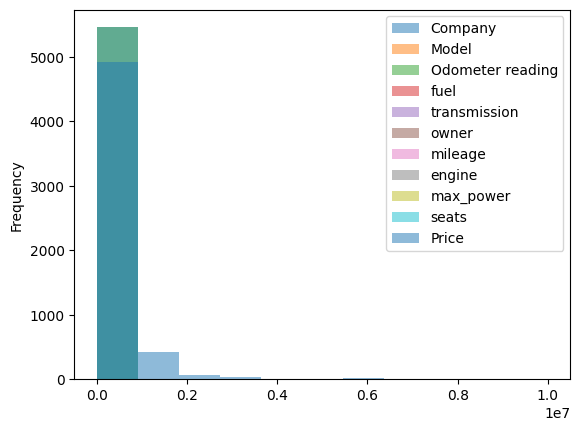

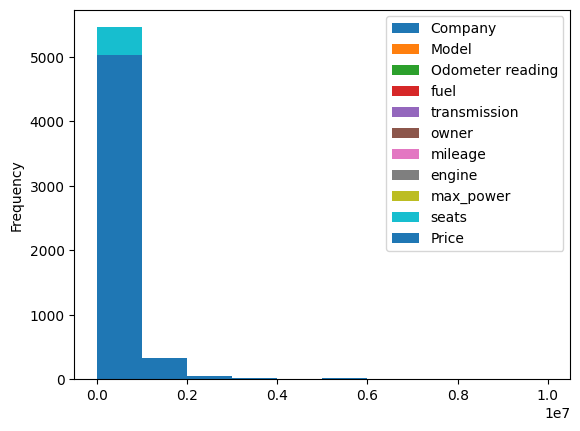

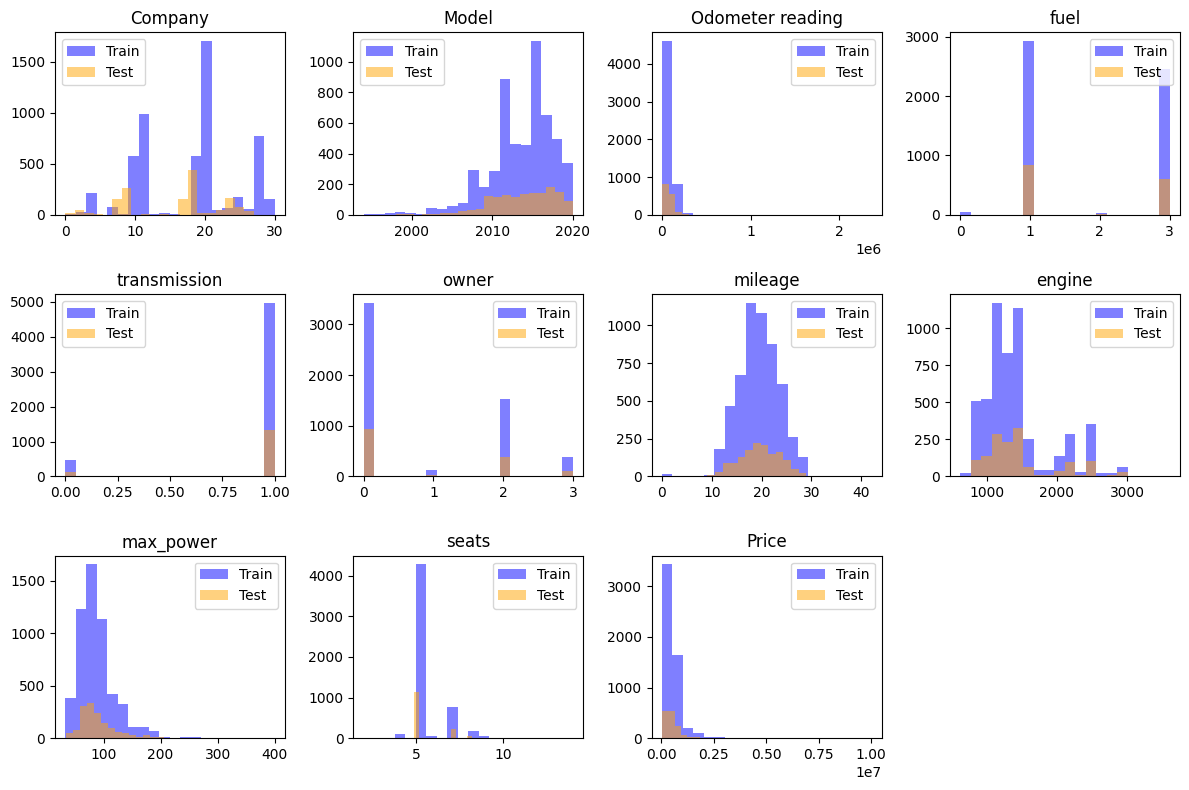

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Assuming df_train and df_test are your train and test DataFrames
# First, let's compare the distributions of each feature using the Kolmogorov-Smirnov test

ks_results = {}
for col in car_train.columns:
    ks_stat, p_value = ks_2samp(car_train[col], car_test[col])
    ks_results[col] = {'KS Statistic': ks_stat, 'P-Value': p_value}

ks_results_df = pd.DataFrame.from_dict(ks_results, orient='index')
print("Kolmogorov-Smirnov Test Results:")
print(ks_results_df)

# Next, let's visualize the distributions of each feature using histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(car_train.columns):
    plt.subplot(3, 4, i + 1)
    plt.hist(car_train[col], bins=20, alpha=0.5, label='Train', color='blue')
    plt.hist(car_test[col], bins=20, alpha=0.5, label='Test', color='orange')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()


Based on the observations about the train and test datasets, we can make some general expectations regarding the training and testing accuracy with an MLP:

Features with Similar Distributions: Features such as 'Model', 'Transmission', and 'Owner' that show similar distributions between the train and test datasets are likely to contribute similarly to the model's performance on both datasets. We might expect these features to have a consistent impact on accuracy.

Features with Different Distributions: Features like 'Company', 'Odometer reading', 'Fuel', 'Mileage', 'Engine', 'Max Power', 'Seats', and 'Price' that exhibit different distributions between the train and test datasets may lead to varying impacts on the model's performance.

Impact on Accuracy:

Features with similar distributions are likely to contribute similarly to the model's accuracy on both datasets, potentially leading to consistent performance.
Features with different distributions may lead to discrepancies in model performance between the train and test datasets. The model might perform better on the training dataset (where the model is trained) compared to the testing dataset (which represents unseen data), especially if the model overfits to the training data.
Training and Testing Accuracy: Given the discrepancies in the distributions of some features, we might expect the training accuracy to be higher than the testing accuracy. This is because the model may have learned patterns specific to the training dataset that do not generalize well to unseen data.

In summary, the differences in feature distributions between the train and test datasets could lead to varying impacts on the MLP's performance. The model might perform well on features with similar distributions but could exhibit discrepancies in accuracy for features with different distributions. Overfitting to the training data due to these differences could also result in higher training accuracy compared to testing accuracy.

Given the distribution results about the training and testing datasets, the observed behavior of your MLP regressor is somewhat expected, especially if the features with different distributions are influential in predicting the target variable (price).

Here's a breakdown:

1. **Training Accuracy (80%)**: The model achieves a relatively high training accuracy, which could indicate that it has learned the patterns present in the training dataset well. However, since there are differences in the distributions of some features between the train and test datasets, the model might be overfitting to the training data, capturing noise or specific patterns that do not generalize well to unseen data.

2. **Testing Accuracy (50%)**: The lower testing accuracy suggests that the model's performance on the test dataset is not as good as on the training dataset. This could be due to the model's inability to generalize well to unseen data, possibly because it has memorized the training dataset's peculiarities rather than learning generalizable patterns.

3. **Impact of Feature Distributions**: Features with different distributions between the train and test datasets, such as 'Company', 'Odometer reading', 'Fuel', 'Mileage', 'Engine', 'Max Power', 'Seats', and 'Price', could be contributing to the lower testing accuracy. If these features are crucial for predicting the target variable (price) and the model has learned relationships that are specific to the training dataset, it may struggle to perform well on the test dataset.

In summary, the observed training and testing accuracies are somewhat expected given the differences in feature distributions between the train and test datasets. To improve the model's performance, you might consider:
- Further analyzing the impact of specific features on the model's predictions.
- Experimenting with different model architectures, hyperparameters, or regularization techniques to reduce overfitting and improve generalization to unseen data.
- Exploring ways to make the training and test datasets more similar in terms of feature distributions, if feasible and appropriate for your problem domain.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(8,), (16,), (16, 4), (16, 8, 4)],
    'activation': ['relu'],
    'solver': ['sgd'], #'adam',
    'learning_rate': ['constant'] #, 'invscaling', 'adaptive'
}

# Create an instance of MLPRegressor
mlp = MLPRegressor(max_iter=500)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring=make_scorer(mean_squared_error), n_jobs=-1)
grid_search.fit(car_train_norm, car_train_target)

# Access the best estimator and its hyperparameters
best_mlp = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_mlp.predict(car_test_norm)
mse = mean_squared_error(car_test_target, y_pred)

print("Best MLP configuration:", best_params)
print("Mean Squared Error on test set:", mse)

r_squared = r2_score(car_test_target, y_pred)
print("R-squared:", r_squared)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best MLP configuration: {'activation': 'relu', 'hidden_layer_sizes': (8,), 'learning_rate': 'constant', 'solver': 'sgd'}
Mean Squared Error on test set: 0.017025443831819958
R-squared: -0.710786508716831
